<a href="https://colab.research.google.com/github/mohamedmamdouh22/sparks/blob/main/Sparks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.shape

(25, 2)

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**awesome No Null values**

check the data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


good

nothing to clean so go ahead to exploratory data analysis

# EDA

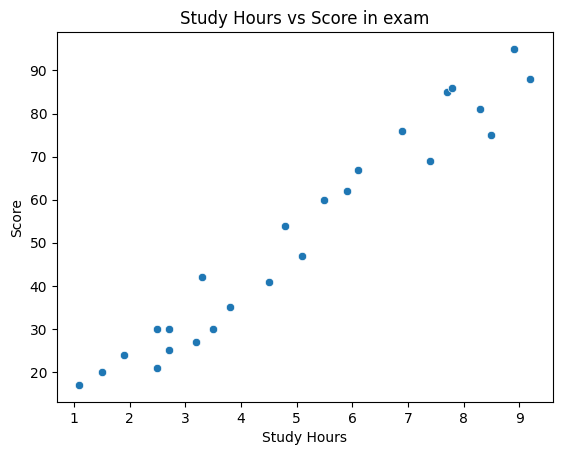

In [ ]:
sns.scatterplot(data=df,x='Hours',y='Scores');
plt.xlabel('Study Hours')
plt.ylabel("Score")
plt.title('Study Hours vs Score in exam');

It is pretty easy to see that it is positive relationship between study hours and score

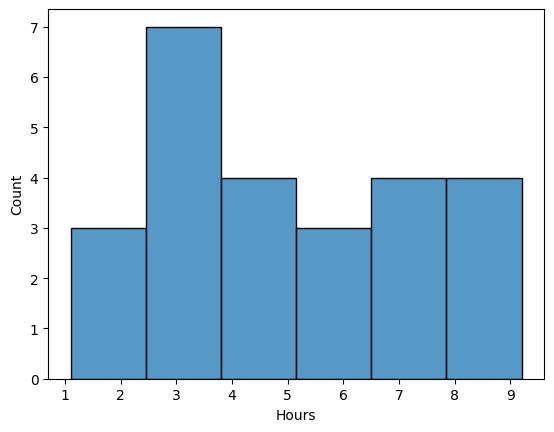

In [ ]:
sns.histplot(data=df,x='Hours');

It is clear that students study hours is distributed from 1 to 9 and the major students study about 3 hours

In [ ]:
corr=df.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## data split

In [ ]:
target='Scores'
X=df.iloc[:,:-1].values
y=df[target].values
print(X.shape)
print(y.shape)

(25, 1)
(25,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


Baseline model

In [ ]:
y_mean=[y_train.mean()]*len(y_train)
mean_absolute_error(y_train,y_mean)

22.75

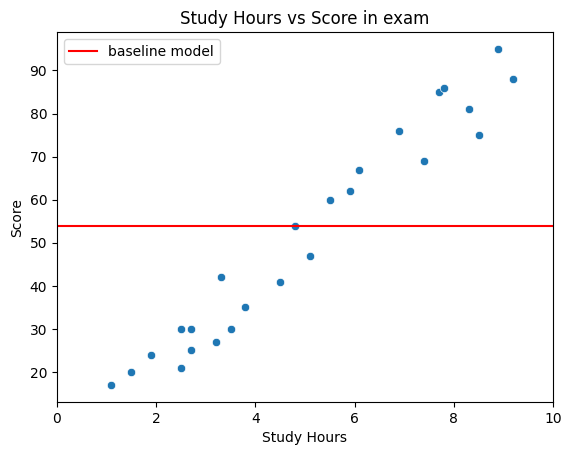

In [ ]:
plt.plot(y_mean,c='red',label='baseline model')
sns.scatterplot(data=df,x='Hours',y='Scores');
plt.xlim([0,10])
plt.xlabel('Study Hours')
plt.ylabel("Score")
plt.title('Study Hours vs Score in exam');

baseline MAE is 22.14 so we should hit it

# Linear Regression model

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_train)

In [ ]:
y_pred

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

In [ ]:
mean_absolute_error(y_train,y_pred)

5.186601709180373

very good mse it hits baseline by about 17 hour

In [ ]:
w=lr.coef_
b=lr.intercept_
print(w,b)

[9.91065648] 2.018160041434662


In [ ]:
print(f'Linear equation is {w[0].round(2)}X+{b.round(2)}')

Linear equation is 9.91X+2.02


In [ ]:
df_pred=pd.DataFrame({'actual':y_train,'predict':y_pred})
df_pred.head()

,actual,predict
0,35,39.678655
1,24,20.848407
2,86,79.321281
3,76,70.401690
4,17,12.919882


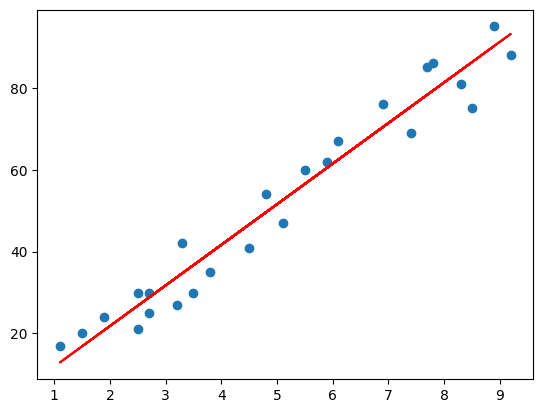

In [ ]:
line = w*X+b
plt.scatter(X, y)
plt.plot(X, line,c='red');
plt.show()

# Make predictions

In [ ]:
y_test_prd=lr.predict(X_test)

In [ ]:
df_test=pd.DataFrame({'actual':y_test,'prdiction':y_test_prd})
df_test

,actual,prdiction
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
mae=mean_absolute_error(y_test,y_test_prd)
mae

4.183859899002982

very goo d mae for test data

In [ ]:
h=9.25
hours = np.array([[h]])
prd = lr.predict(hours)
print(f"No of Hours = {h}")
print(f"Predicted Score = {prd[0].round(2)}")

No of Hours = 9.25
Predicted Score = 93.69


Thank U